<h1>Lending Club Loan Default Analysis</h1>

In [1]:
import pandas as pd

pd.set_option("display.max_columns", None)

<h3>Importing first 1000 rows of data out of 2 million.</h3>

In [2]:
#data used From P2P site LendingClub
df= pd.read_csv(r"E:\lendingclub\lending_club_loan_two.csv", nrows=1000)

In [3]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


<h3>Data Cleaning</h3>

In [4]:
#removing unit - months from term column 
df['term'] = df['term'].str.replace('months', '')
df['term'] = df['term'].astype(int)

In [5]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


In [6]:
pd.set_option('display.max_rows', None)

In [7]:
#dropping all records having any Null values in its rows
df = df.dropna(how='any',axis=0) 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             869 non-null    float64
 1   term                  869 non-null    int32  
 2   int_rate              869 non-null    float64
 3   installment           869 non-null    float64
 4   grade                 869 non-null    object 
 5   sub_grade             869 non-null    object 
 6   emp_title             869 non-null    object 
 7   emp_length            869 non-null    object 
 8   home_ownership        869 non-null    object 
 9   annual_inc            869 non-null    float64
 10  verification_status   869 non-null    object 
 11  issue_d               869 non-null    object 
 12  loan_status           869 non-null    object 
 13  purpose               869 non-null    object 
 14  title                 869 non-null    object 
 15  dti                   8

In [9]:
#chcking if data has 10 years or is it so ,
#all exact 10 years have been considered 10+ years in general. 
df.loc[df['emp_length'] == '10 years']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [10]:
#no rows indicate our assumption of exact 10 years as 10+ years holds true.

In [11]:
#data cleaning

df_with_plus_removed= df['emp_length'].str.split("+").str[0]


In [12]:
df_with_years_removed = df_with_plus_removed.str.replace('years', '')

In [13]:
df_with_years_removed.head(5)

0          10
1          4 
2    < 1 year
3          6 
4          9 
Name: emp_length, dtype: object

In [46]:
pd.options.mode.chained_assignment = None 
#avoids warning caused by using inplace = True

<h2>Catagorizing String Data</h2>

In [15]:
df.application_type.replace(to_replace=dict(INDIVIDUAL=1, JOINT=0), inplace=True)

In [16]:
df.initial_list_status.replace(to_replace=dict(w=1, f=0), inplace=True)

In [17]:
# pd.unique(df[['Col1', 'Col2']].values.ravel('K')) for 2 colums' unique values
pd.unique(df[['home_ownership']].values.ravel('K'))

array(['RENT', 'MORTGAGE', 'OWN'], dtype=object)

In [18]:
df.home_ownership.replace(to_replace=dict(OWN=1, RENT=0,MORTGAGE=3), inplace=True)

In [19]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,0,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,3,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,0,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


In [20]:
pd.unique(df[['verification_status']].values.ravel('K'))

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [21]:
mapping = {'Not Verified': 0, 'Verified': 1,'Source Verified' : 2}
#avoid inplace
df=df.replace({'verification_status': mapping})

In [22]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,0,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,3,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,0,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


In [23]:
pd.unique(df[['grade']].values.ravel('K'))

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [24]:
grade_mapping = {'A': 1, 'B': 2,'C' : 3,'D': 4, 'E': 5,'F' : 6,'G' : 7}
df=df.replace({'grade': grade_mapping})

In [25]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,2,B4,Marketing,10+ years,0,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,2,B5,Credit analyst,4 years,3,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,2,B3,Statistician,< 1 year,0,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


In [26]:
pd.unique(df[['loan_status']].values.ravel('K'))

array(['Fully Paid', 'Charged Off'], dtype=object)

In [27]:
loan_status_mapping = {'Fully Paid': 1, 'Charged Off': 2}
df=df.replace({'loan_status': loan_status_mapping})

In [28]:
df['loan_status'].corr(df['verification_status'])
#this correlation is not accurate as it is uses pearson which isnt accurate for categorical values
#but only for continuous ones.

0.07215581086783944

<h2>Data Correlation</h2>

In [29]:
df.corr()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.393977,0.150712,0.951031,0.165343,0.186125,0.405123,0.194583,0.014507,0.009141,0.192229,-0.088576,0.377737,0.089385,0.223559,0.082525,0.030559,0.198116,-0.118863
term,0.393977,1.000000,0.433398,0.141138,0.473918,0.115521,0.084677,0.210480,0.167627,0.084180,0.097722,0.034706,0.083010,0.050219,0.121359,0.203933,0.018679,0.095370,-0.003266
int_rate,0.150712,0.433398,1.000000,0.151313,0.955033,-0.037689,-0.058952,0.118578,0.240296,0.128170,0.016962,0.130949,-0.014446,0.244861,0.000707,-0.075077,0.034754,-0.040504,0.115559
installment,0.951031,0.141138,0.151313,1.000000,0.148657,0.152400,0.388377,0.161826,-0.004164,-0.001188,0.167551,-0.085996,0.363899,0.112501,0.192044,0.012418,0.030072,0.168885,-0.106371
grade,0.165343,0.473918,0.955033,0.148657,1.000000,-0.033157,-0.038373,0.138500,0.269864,0.119401,0.023363,0.143920,-0.012877,0.200147,0.023155,-0.016197,0.020564,-0.034856,0.125895
home_ownership,0.186125,0.115521,-0.037689,0.152400,-0.033157,1.000000,0.156085,-0.011990,-0.033007,0.029773,0.130183,-0.038408,0.226346,0.071325,0.246277,0.062869,0.012850,0.486560,-0.055044
annual_inc,0.405123,0.084677,-0.058952,0.388377,-0.038373,0.156085,1.000000,0.092528,-0.060335,-0.225210,0.174758,-0.062400,0.370829,0.001781,0.224277,0.045810,0.014372,0.231179,-0.093171
verification_status,0.194583,0.210480,0.118578,0.161826,0.138500,-0.011990,0.092528,1.000000,0.072156,0.068389,0.088359,0.048765,0.045697,0.015837,0.091732,0.081396,0.042144,-0.003610,0.027591
loan_status,0.014507,0.167627,0.240296,-0.004164,0.269864,-0.033007,-0.060335,0.072156,1.000000,0.066024,-0.014313,0.051850,-0.064325,0.052526,-0.063668,0.055846,0.015690,-0.047565,0.022349
dti,0.009141,0.084180,0.128170,-0.001188,0.119401,0.029773,-0.225210,0.068389,0.066024,1.000000,0.357242,-0.031170,0.161887,0.201147,0.280258,0.047471,-0.046355,0.017684,-0.028990


In [30]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,2,B4,Marketing,10+ years,0,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,2,B5,Credit analyst,4 years,3,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,2,B3,Statistician,< 1 year,0,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


In [31]:
pd.unique(df[['loan_status']].values.ravel('K'))
#all unique values in loan_status columns

array([1, 2], dtype=int64)

In [32]:
df['emp_length']=df_with_years_removed

In [33]:
df['emp_length']
pd.unique(df['emp_length'].values.ravel('K'))

array(['10', '4 ', '< 1 year', '6 ', '9 ', '2 ', '3 ', '8 ', '7 ', '5 ',
       '1 year'], dtype=object)

In [34]:
df_with_less_than_1_year_replaced = df['emp_length'].str.replace('< 1 year', '0.6')

In [35]:
df_with_less_than_1_year_replaced.head(3)

0     10
1     4 
2    0.6
Name: emp_length, dtype: object

In [36]:
df_with_1_year_as_1=df_with_less_than_1_year_replaced.str.replace('1 year', '1')

In [37]:
df['emp_length']=df_with_1_year_as_1

In [38]:
df.corr()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.393977,0.150712,0.951031,0.165343,0.186125,0.405123,0.194583,0.014507,0.009141,0.192229,-0.088576,0.377737,0.089385,0.223559,0.082525,0.030559,0.198116,-0.118863
term,0.393977,1.000000,0.433398,0.141138,0.473918,0.115521,0.084677,0.210480,0.167627,0.084180,0.097722,0.034706,0.083010,0.050219,0.121359,0.203933,0.018679,0.095370,-0.003266
int_rate,0.150712,0.433398,1.000000,0.151313,0.955033,-0.037689,-0.058952,0.118578,0.240296,0.128170,0.016962,0.130949,-0.014446,0.244861,0.000707,-0.075077,0.034754,-0.040504,0.115559
installment,0.951031,0.141138,0.151313,1.000000,0.148657,0.152400,0.388377,0.161826,-0.004164,-0.001188,0.167551,-0.085996,0.363899,0.112501,0.192044,0.012418,0.030072,0.168885,-0.106371
grade,0.165343,0.473918,0.955033,0.148657,1.000000,-0.033157,-0.038373,0.138500,0.269864,0.119401,0.023363,0.143920,-0.012877,0.200147,0.023155,-0.016197,0.020564,-0.034856,0.125895
home_ownership,0.186125,0.115521,-0.037689,0.152400,-0.033157,1.000000,0.156085,-0.011990,-0.033007,0.029773,0.130183,-0.038408,0.226346,0.071325,0.246277,0.062869,0.012850,0.486560,-0.055044
annual_inc,0.405123,0.084677,-0.058952,0.388377,-0.038373,0.156085,1.000000,0.092528,-0.060335,-0.225210,0.174758,-0.062400,0.370829,0.001781,0.224277,0.045810,0.014372,0.231179,-0.093171
verification_status,0.194583,0.210480,0.118578,0.161826,0.138500,-0.011990,0.092528,1.000000,0.072156,0.068389,0.088359,0.048765,0.045697,0.015837,0.091732,0.081396,0.042144,-0.003610,0.027591
loan_status,0.014507,0.167627,0.240296,-0.004164,0.269864,-0.033007,-0.060335,0.072156,1.000000,0.066024,-0.014313,0.051850,-0.064325,0.052526,-0.063668,0.055846,0.015690,-0.047565,0.022349
dti,0.009141,0.084180,0.128170,-0.001188,0.119401,0.029773,-0.225210,0.068389,0.066024,1.000000,0.357242,-0.031170,0.161887,0.201147,0.280258,0.047471,-0.046355,0.017684,-0.028990


<h2>Heat Map of data correlation</h2>

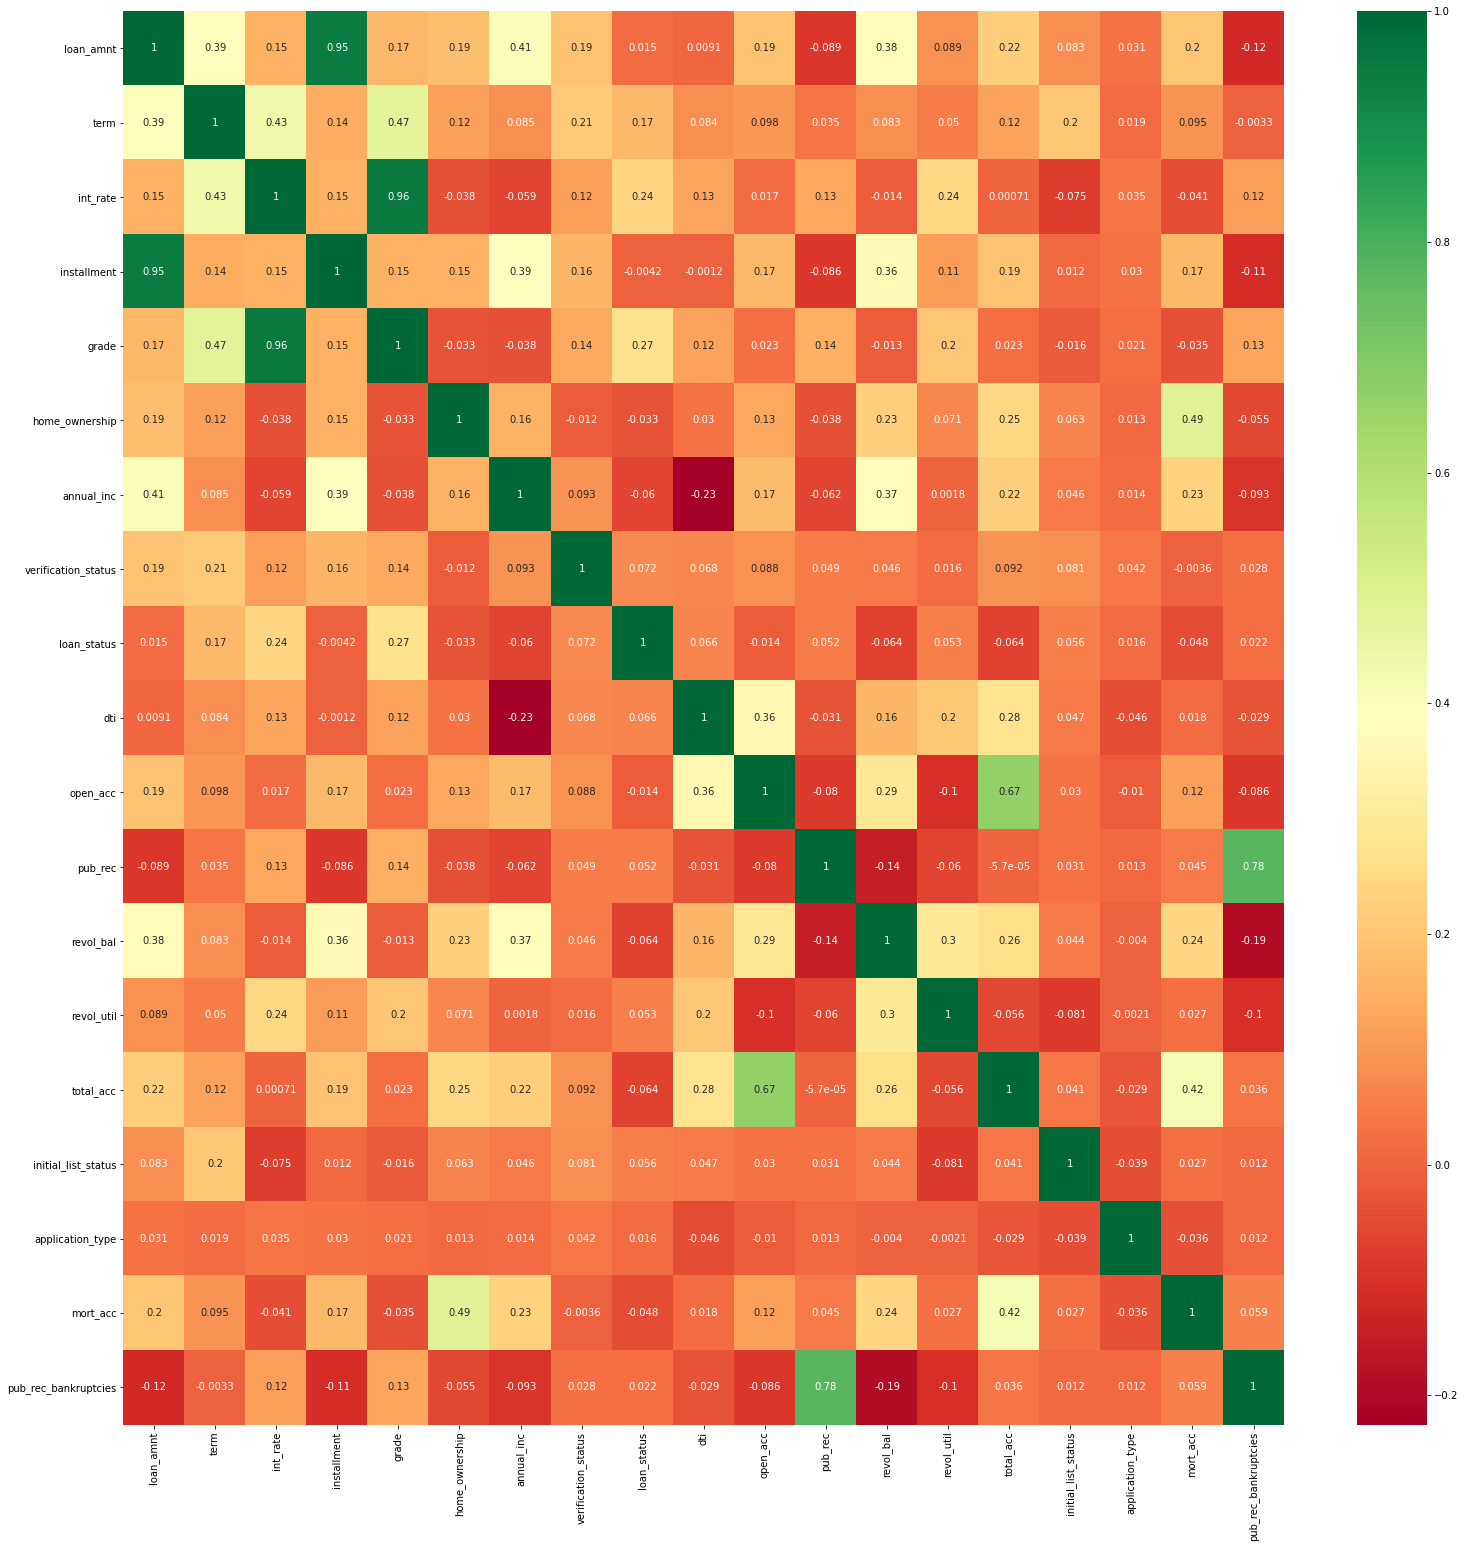

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(26,26))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")



In [40]:
#total data set = 869
df['loan_status'].shape

(869,)

In [41]:
#Source verified number who paid = 238
df.loc[(df['loan_status'] == 1) & (df['verification_status'] == 2)].shape

(238, 27)

In [42]:
#verified number who paid = 236
df.loc[(df['loan_status'] == 1) & (df['verification_status'] == 1)].shape

(236, 27)

In [43]:
#un-verified number who paid = 242
df.loc[(df['loan_status'] == 1) & (df['verification_status'] == 0)].shape

(242, 27)

In [44]:
#those who never paid
#shouldve made it 0 , change later
df.loc[(df['loan_status'] == 2)].shape

(153, 27)

<h3>Understanding correlation</h3>
<a>https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365</a></br>
<img src="https://miro.medium.com/max/700/1*6KNXPv-_3s7cJrcOQxbZCw.png"
     style="float: left; margin-right: 10px;" />

In [45]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,2,B4,Marketing,10,0,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,2,B5,Credit analyst,4,3,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,2,B3,Statistician,0.6,0,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,1,A2,Client Advocate,6,0,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,3,C5,Destiny Management Inc.,9,3,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36,13.33,677.07,3,C3,HR Specialist,10,3,86788.0,...,8.0,0.0,25757.0,100.6,23.0,0,1,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36,5.32,542.07,1,A1,Software Development Engineer,2,3,125000.0,...,8.0,0.0,4178.0,4.9,25.0,0,1,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36,11.14,426.47,2,B2,Office Depot,10,0,46000.0,...,11.0,0.0,13425.0,64.5,15.0,0,1,0.0,0.0,USCGC Nunez\r\nFPO AE 30723
8,18900.0,60,10.99,410.84,2,B3,Application Architect,10,0,103000.0,...,13.0,0.0,18637.0,32.9,40.0,1,1,3.0,0.0,USCGC Tran\r\nFPO AP 22690
9,26300.0,36,16.29,928.40,3,C5,Regado Biosciences,3,3,115000.0,...,13.0,0.0,22171.0,82.4,37.0,0,1,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813"
